In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import glob
import ntpath
from hydro import objective_fxns as obx
from rhessys import utilities as ut
%matplotlib inline
import seaborn as sns

In [2]:
AFX = pd.read_pickle('../greenness_timing/data/AFX2_new.pcl')
AFX['wateryear'] = AFX.index.map(ut.wateryear)
AFX = AFX.loc[(AFX.wateryear>=2004) & (AFX.wateryear<=2012),:]
AFX2 = AFX.groupby(by='wateryear').sum()
AFX2.reset_index(inplace=True)
#AFX3 = AFX.resample('D',how=np.sum)
AFX4 = AFX.resample('7D',how=np.sum)
AFX5 = AFX.resample('M',how=np.sum)

In [3]:
#AFX2 = pd.read_pickle('../greenness_timing/data/AFX_niwot_yearly.pcl')
#AFX2.head()

In [5]:
ct = 9

In [7]:
def analyze():
    fl = '/RHESSys/ComoCreek_new/out/et/et_cal59_'+str(ct-1)+'_basin.daily'
    dat = ut.readRHESSysBasin(fl)
    dat['wateryear'] = dat.index.map(ut.wateryear)
    dat = dat.loc[(dat.wateryear>=2004) & (dat.wateryear<=2012),:]
    dat['ET2'] = dat['ET']+dat['snow_subl']
    
    
    dat4 = dat.resample('7D',how=np.sum)
    dat5 = dat.resample('M',how=np.sum)

    #dat4.loc[dat4.ET>50,'ET'] = np.NaN
    
    #print fl,'Loaded'

    dat['accumP'] = np.NaN
    dat['accumS'] = np.NaN
    for wy in np.unique(dat.wateryear):
        dat.loc[dat.wateryear==wy,'accumP']=dat.loc[dat.wateryear==wy,'precip'].cumsum()
        dat.loc[dat.wateryear==wy,'accumS']=dat.loc[dat.wateryear==wy,'snowfall'].cumsum()

    dat2 = dat.groupby(by='wateryear').sum()
    dat2.reset_index(inplace=True)

    pth,basename = ntpath.split(fl)
    prts = basename.split('_')
    zonepth = pth+'/'+prts[0]+'_'+prts[1]+'_'+prts[2]+'_zone_zone.params'
    soilpth = pth+'/'+prts[0]+'_'+prts[1]+'_'+prts[2]+'_sandyloam_soil.params'

    #print zonepth
    #print soilpth

    z = {}
    with open(zonepth) as f:
        for line in f:
            (val,key) = line.split(None)
            z[key]=val

    s = {}
    with open(soilpth) as f:
        for line in f:
            (val,key) = line.split(None)
            s[key]=val

    
    #print z['max_snow_temp'],'max_snow_temp'
    #print z['min_rain_temp'],'min_rain_temp'
    #print z['temcf'],'temcf'
    #print s['maximum_snow_energy_deficit'],'maximum_snow_energy_deficit'
    #print s['snow_melt_Tcoef'],'snow_melt_Tcoef'
    return [dat,dat2,dat4,dat5]
#print round(obx.nashsut(SWE.swe,dat.snowpack),2), 'SWE NSE'
#print round(obx.percenterror(SWE.swe,dat.snowpack),2), 'SWE Percent Error'
#print round(hydroR2(SWE.swe,dat.snowpack),2), 'SWE R2'

In [65]:
whdr = '-whdr /RHESSys/ComoCreek_new/worldfiles/world.como.lai.hdr '
w = '-w /RHESSys/ComoCreek_new/worldfiles/world.AFX '
t = '-t /RHESSys/ComoCreek_new/tecfiles/snow.tec '
strt = '-st 2003 10 1 1 '
nd = '-ed 2013 09 30 1 '
f = '-r /RHESSys/ComoCreek_new/flowtables/AFX.flow '
soil = '-s 15 15 -gw 0.1 0.5 '
flg = '-b '
prog = 'rhessys5.19 '
pre = '-pre /RHESSys/ComoCreek_new/out/et/et_cal59_'+str(ct)

cmd = prog+w+whdr+t+strt+nd+f+soil+flg+pre
print cmd
os.system(cmd)
ct = ct+1

dat,dat2,dat4,dat5 = analyze()

rhessys5.19 -w /RHESSys/ComoCreek_new/worldfiles/world.AFX -whdr /RHESSys/ComoCreek_new/worldfiles/world.como.lai.hdr -t /RHESSys/ComoCreek_new/tecfiles/snow.tec -st 2003 10 1 1 -ed 2013 09 30 1 -r /RHESSys/ComoCreek_new/flowtables/AFX.flow -s 15 15 -gw 0.1 0.5 -b -pre /RHESSys/ComoCreek_new/out/et/et_cal59_8


In [8]:
dat,dat2,dat4,dat5 = analyze()

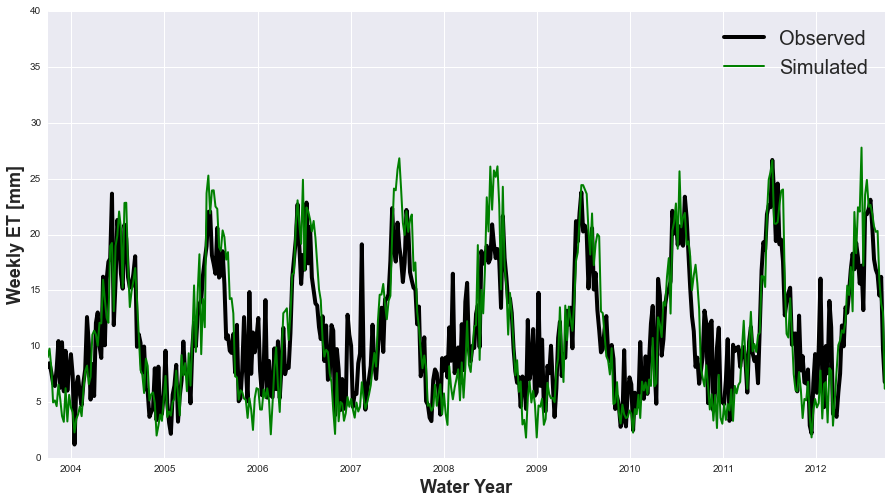

In [12]:
#strt = '2011-1-01'
#nd = '2011-12-31'
#[strt:nd]

plt.figure(figsize=(15,8))
plt.plot(AFX4.index,AFX4.ET,'-k',lw=4)
plt.plot(dat4.index,dat4.ET,'-g',lw=2)
#plt.plot(dat4.index,dat4.ET2,'-r',lw=2)
#plt.plot(dat4.index,dat4.Kdown,'-r',lw=2)
plt.legend(['Observed','Simulated'], fontsize=20,loc='best')
#plt.xlim('2003-10-1','2012-9-30')
plt.xlabel('Water Year', fontsize=18,weight = 'bold')
plt.ylabel('Weekly ET [mm]', fontsize=18,weight = 'bold')
plt.ylim(0,40)
plt.savefig('/RHESSys/ComoCreek_new/figures/AFX_ET_cal.png',dpi=300, bbox_inches='tight')

-2.03744083674


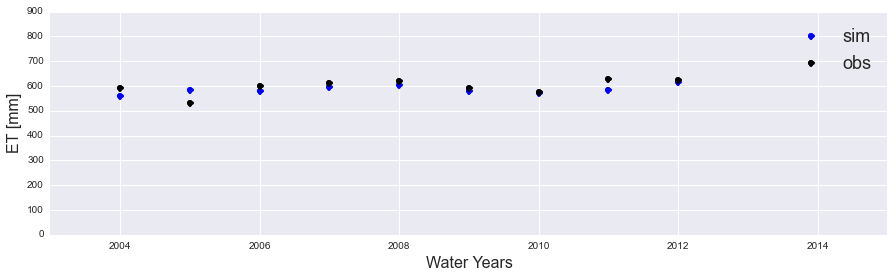

In [67]:
plt.figure(figsize=(15,4))
plt.plot(dat2.wateryear,dat2.ET,'ob') # simulation
plt.plot(AFX2.wateryear,AFX2.ET,'ok') # obs
plt.xlabel('Water Years',fontsize=16)
plt.ylabel('ET [mm]', fontsize=16)
plt.xlim(2003,2015)
plt.ylim(0,900)
print np.sum(dat4.ET-AFX4.ET)/np.sum(AFX4.ET)*100.
plt.legend(['sim','obs'], fontsize=18)

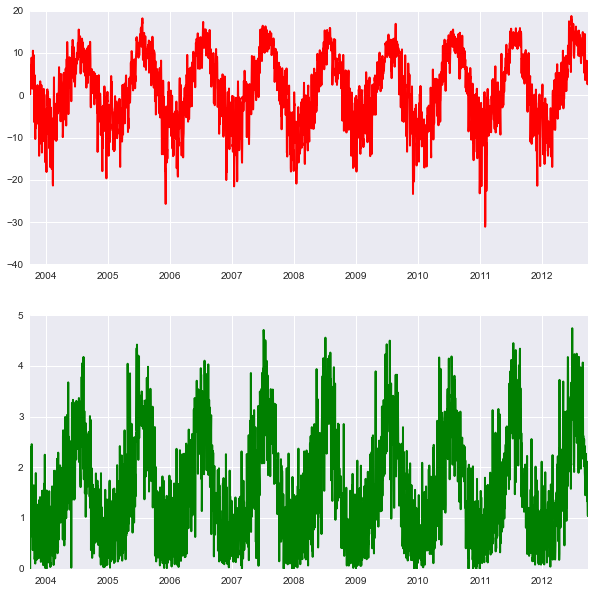

In [57]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax1.plot(dat.index,dat.tavg,'-r',lw=2)
ax2 = fig.add_subplot(212)
ax2.plot(dat.index,dat.ET,'-g',lw=2)

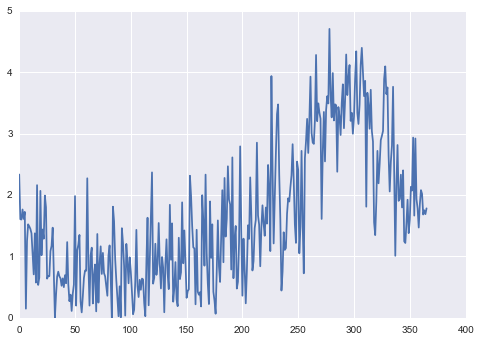

In [14]:
plt.plot(dat['2007-10-1':'2008-9-30'].ET)